In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from glob import glob
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
normal_images = glob("dataset/Normal/*.jpg")
viral_images = glob("dataset/Viral_Pneumonia/*.jpg")

In [3]:
print(f"Number of normal images: {len(normal_images)}")
print(f"Number of viral pneumonia images: {len(viral_images)}")

Number of normal images: 1250
Number of viral pneumonia images: 1100


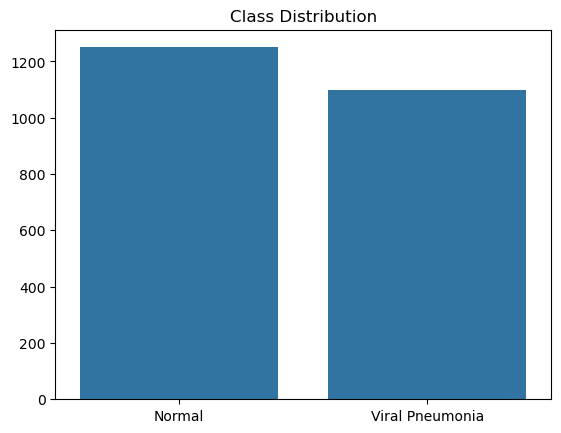

In [24]:
sns.barplot(x=['Normal', 'Viral Pneumonia'], y=[len(normal_images), len(viral_images)])
plt.title("Class Distribution")
plt.show()

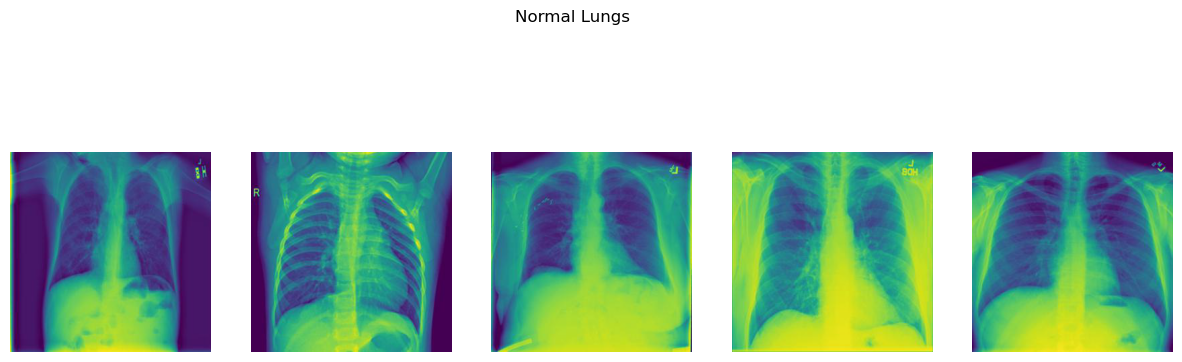

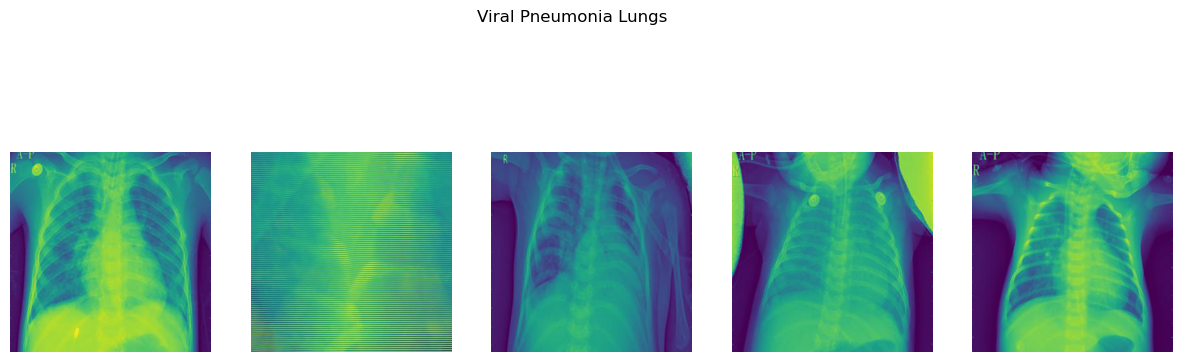

In [25]:
def plot_images(image_paths, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle(title)
    
    for i, img_path in enumerate(image_paths[:5]):
        img = Image.open(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
    
    plt.show()

# Display sample images
plot_images(normal_images, "Normal Lungs")
plot_images(viral_images, "Viral Pneumonia Lungs")

In [26]:

# Set image size
IMG_SIZE = 128

# Load and preprocess images
def load_images(image_paths, label):
    data = []
    labels = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode="grayscale")  # Convert to grayscale
        img = img_to_array(img) / 255.0  # Normalize pixel values
        img = img.flatten()  # Flatten into 1D array
        data.append(img)
        labels.append(label)
    return np.array(data), np.array(labels)

img1 =  load_img("dataset/Normal/8.jpg", target_size=(IMG_SIZE, IMG_SIZE), color_mode="grayscale") 
img1 = img_to_array(img1) / 255.0  # Normalize pixel values
print(img1)
print("  ")
print("  ")
print("  ")
img1 = img1.flatten()  # Flatten into 1D array
print(img1)

[[[0.11764706]
  [0.11764706]
  [0.11764706]
  ...
  [0.11764706]
  [0.11764706]
  [0.11764706]]

 [[0.11764706]
  [0.11764706]
  [0.11764706]
  ...
  [0.11764706]
  [0.11764706]
  [0.11764706]]

 [[0.11764706]
  [0.11764706]
  [0.11764706]
  ...
  [0.11764706]
  [0.11764706]
  [0.11764706]]

 ...

 [[0.11764706]
  [0.11764706]
  [0.11764706]
  ...
  [0.6039216 ]
  [0.5686275 ]
  [0.4862745 ]]

 [[0.11764706]
  [0.11764706]
  [0.11764706]
  ...
  [0.59607846]
  [0.5529412 ]
  [0.47843137]]

 [[0.11764706]
  [0.11764706]
  [0.11764706]
  ...
  [0.57254905]
  [0.5254902 ]
  [0.4627451 ]]]
  
  
  
[0.11764706 0.11764706 0.11764706 ... 0.57254905 0.5254902  0.4627451 ]


In [27]:

# Load datasets
X_normal, y_normal = load_images(normal_images, label=0)
X_viral, y_viral = load_images(viral_images, label=1)
print(X_normal)
print(y_normal)
print(X_viral)
print(y_viral)

# Combine data
X = np.vstack((X_normal, X_viral))
y = np.hstack((y_normal, y_viral))

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y, num_classes=2)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Input shape: {X_train.shape[1:]}")

[[0.6392157  0.38039216 0.2509804  ... 0.2784314  0.2784314  0.27450982]
 [0.11372549 0.12156863 0.10588235 ... 0.11764706 0.11764706 0.11764706]
 [0.20392157 0.21568628 0.11372549 ... 0.81960785 0.84313726 0.3764706 ]
 ...
 [0.34509805 0.34117648 0.44705883 ... 0.12156863 0.11372549 0.11764706]
 [0.11764706 0.12156863 0.12156863 ... 0.4627451  0.44705883 0.3882353 ]
 [0.15686275 0.16078432 0.15294118 ... 0.5137255  0.49411765 0.45490196]]
[0 0 0 ... 0 0 0]
[[0.24313726 0.2627451  0.27450982 ... 0.17254902 0.1882353  0.1764706 ]
 [0.4627451  0.4627451  0.46666667 ... 0.4745098  0.46666667 0.48235294]
 [0.34117648 0.3372549  0.3372549  ... 0.24313726 0.23921569 0.23529412]
 ...
 [0.44313726 0.43529412 0.42352942 ... 0.17254902 0.1764706  0.1764706 ]
 [0.2509804  0.2784314  0.2901961  ... 0.09803922 0.16078432 0.13725491]
 [0.3137255  0.3372549  0.36862746 ... 0.11764706 0.11764706 0.11764706]]
[1 1 1 ... 1 1 1]
Training samples: 1880, Test samples: 470
Input shape: (16384,)


In [28]:

# Define the NN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMG_SIZE * IMG_SIZE,)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    # Dense(2, activation='softmax')  # Output layer (2 classes)
    Dense(2, activation='sigmoid')  # Output layer (2 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               8389120   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 8,553,602
Trainable params: 8,553,602
No

In [29]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
59/59 [==============================] - 5s 70ms/step - loss: 1.6453 - accuracy: 0.6777 - val_loss: 0.2555 - val_accuracy: 0.9000
Epoch 2/20
59/59 [==============================] - 4s 61ms/step - loss: 0.3633 - accuracy: 0.8516 - val_loss: 0.2261 - val_accuracy: 0.9043
Epoch 3/20
59/59 [==============================] - 3s 58ms/step - loss: 0.2835 - accuracy: 0.8894 - val_loss: 0.2363 - val_accuracy: 0.9043
Epoch 4/20
59/59 [==============================] - 3s 58ms/step - loss: 0.2930 - accuracy: 0.8888 - val_loss: 0.2071 - val_accuracy: 0.9234
Epoch 5/20
59/59 [==============================] - 4s 65ms/step - loss: 0.2708 - accuracy: 0.8936 - val_loss: 0.2266 - val_accuracy: 0.9043
Epoch 6/20
59/59 [==============================] - 4s 62ms/step - loss: 0.2526 - accuracy: 0.9027 - val_loss: 0.2546 - val_accuracy: 0.8957
Epoch 7/20
59/59 [==============================] - 4s 64ms/step - loss: 0.2655 - accuracy: 0.8888 - val_loss: 0.1937 - val_accuracy: 0.9213
Epoch 8/20
59

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

y_pred_probs = model.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype("int32")  # Convert to binary labels (0 or 1)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

15/15 [==============================] - 0s 13ms/step - loss: 0.1629 - accuracy: 0.9213

Test Accuracy: 0.9213
15/15 [==============================] - 0s 10ms/step

Accuracy: 0.9170

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       253
           1       0.86      0.99      0.92       217

   micro avg       0.92      0.92      0.92       470
   macro avg       0.92      0.93      0.92       470
weighted avg       0.93      0.92      0.92       470
 samples avg       0.92      0.92      0.92       470


Confusion Matrix:
[[219  34]
 [  4 213]]


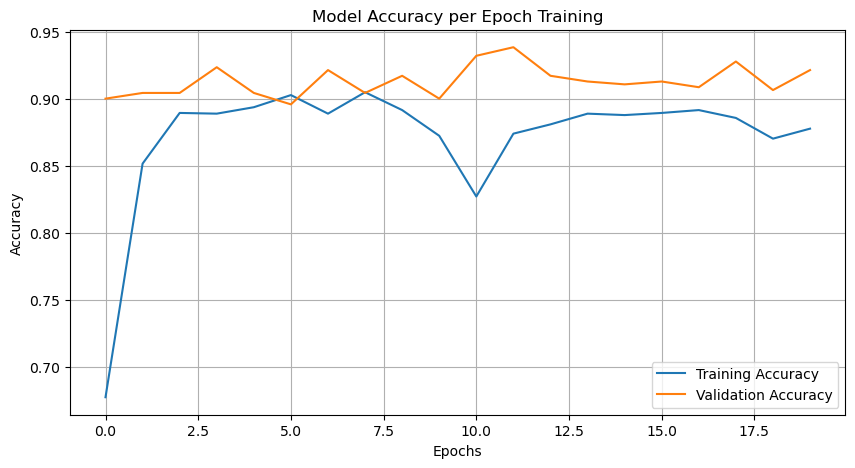

In [31]:
# Plot training & validation accuracy

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Tra')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy per Epoch Training')
plt.legend()
plt.grid()
plt.show()

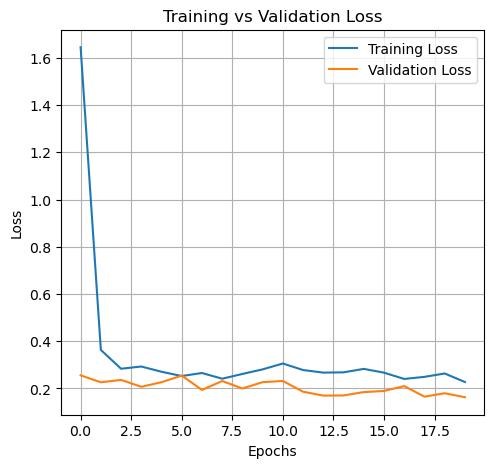

In [32]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()


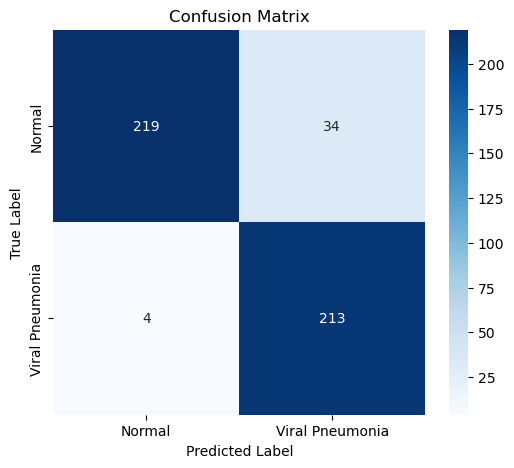

In [33]:

# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Viral Pneumonia'], yticklabels=['Normal', 'Viral Pneumonia'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
model.save("pneumonia_detection_model.h5")  # Saves in HDF5 format

In [35]:
# Step 5: Fine-Tuning & Deployment
# Hyperparameter Tuning: Adjust learning rate, number of layers, dropout, batch size, etc.
# Convert the model to TensorFlow Lite or ONNX if you plan to deploy it on mobile or edge devices.
# Create a simple UI/API using Flask/FastAPI for users to upload images for prediction.
